# Dataset Preparation

In [1]:
!pip install tensorflow
!pip install seaborn
!pip install tensorflow



In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

validation_split = 0.2
num_samples = len(x_train)
num_validation_samples = int(validation_split * num_samples)

x_val = x_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]
x_train = x_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]


# Model Architecture and Training

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))


Epoch 1/10
625/625 [==============================] - 8s 12ms/step - loss: 1.5682 - accuracy: 0.4331 - val_loss: 1.3490 - val_accuracy: 0.5206
Epoch 2/10
625/625 [==============================] - 7s 12ms/step - loss: 1.2430 - accuracy: 0.5584 - val_loss: 1.1694 - val_accuracy: 0.5851
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 1.1031 - accuracy: 0.6129 - val_loss: 1.0774 - val_accuracy: 0.6196
Epoch 4/10
625/625 [==============================] - 7s 12ms/step - loss: 1.0065 - accuracy: 0.6473 - val_loss: 1.0192 - val_accuracy: 0.6448
Epoch 5/10
625/625 [==============================] - 7s 12ms/step - loss: 0.9349 - accuracy: 0.6732 - val_loss: 0.9643 - val_accuracy: 0.6591
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.8778 - accuracy: 0.6959 - val_loss: 0.9553 - val_accuracy: 0.6672
Epoch 7/10
625/625 [==============================] - 7s 12ms/step - loss: 0.8289 - accuracy: 0.7113 - val_loss: 0.9788 - val_accuracy: 0.6629

# Model Evaluation

313/313 [==============================] - 1s 2ms/step - loss: 0.9264 - accuracy: 0.6874
Test Loss: 0.9263685345649719
Test Accuracy: 0.6873999834060669
313/313 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.88      0.71      0.79      1000
           2       0.60      0.56      0.58      1000
           3       0.50      0.57      0.53      1000
           4       0.66      0.62      0.64      1000
           5       0.60      0.54      0.57      1000
           6       0.75      0.77      0.76      1000
           7       0.72      0.75      0.74      1000
           8       0.80      0.78      0.79      1000
           9       0.68      0.88      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



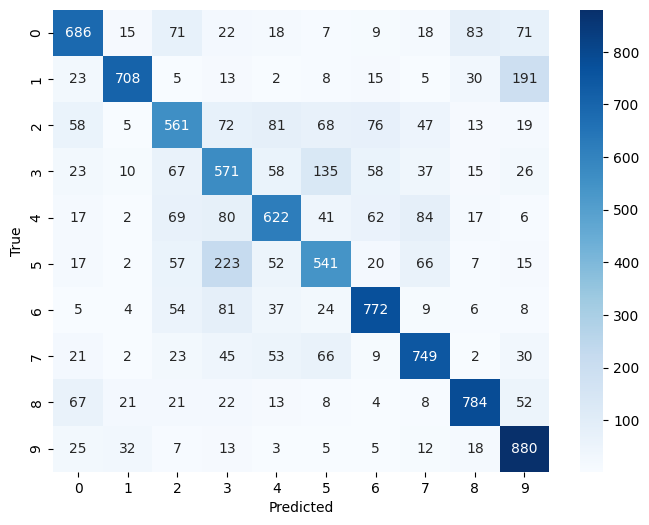

In [4]:
# Evaluate the trained CNN model on the testing set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Calculate evaluation metrics such as accuracy, precision, recall, and F1-score
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# overfit analysis

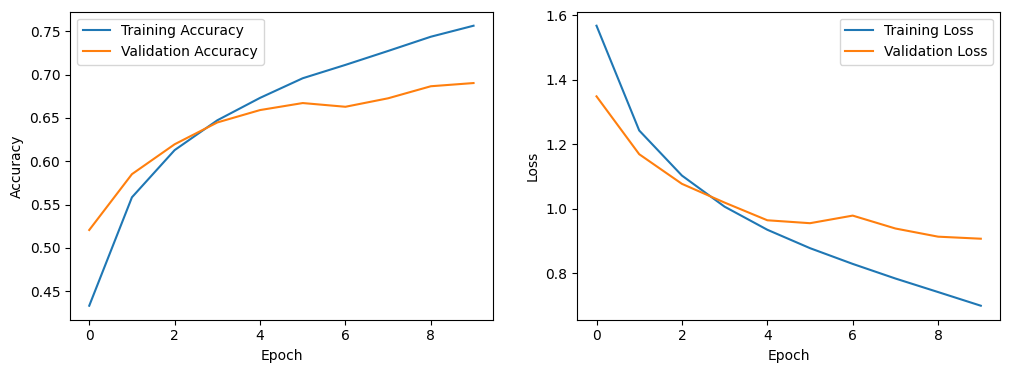

In [5]:
# Monitor training and validation accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
